# Практика 7: Создание и использование генеративных противоречивых примеров (GANbased Adversarial Examples)

Выполнил: Асатрян Давид Робертович ББМО-01-23

# Цель:
Изучить использование генеративных моделей (GAN — Generative Adversarial Networks) для создания противоречивых примеров. В этом задании мы создадим противоречивые примеры с использованием GAN и проверим их влияние на модели классификации.

# Задачи:
Изучить концепцию генеративных противоречивых примеров.
Реализовать простую GAN для создания противоречивых изображений.
Оценить точность моделей классификации на противоречивых примерах, созданных с помощью GAN.
Сравнить атаку на обе модели (полносвязную и свёрточную сети).

Шаг 1: Загруска библиотек

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


Шаг 2: Создадим простой GAN для генерации противоречивых примеров

In [2]:
# Загрузка набора данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype(np.float32) / 255.0  # Нормализация данных

# Добавление дополнительного измерения для работы с CNN
train_images = np.expand_dims(train_images, axis=-1)

# Генератор
def create_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=100),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Дискриминатор
def create_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Инициализация моделей
generator = create_generator()
discriminator = create_discriminator()

# Компиляция дискриминатора
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание GAN
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = tf.keras.Model(gan_input, validity)
gan_model.compile(optimizer='adam', loss='binary_crossentropy')

# Функция для обучения GAN
def train_gan(generator, discriminator, gan_model, epochs=1000, batch_size=64):
    half_batch_size = batch_size // 2
    for epoch in range(epochs):
        # Обучение дискриминатора
        indices = np.random.randint(0, train_images.shape[0], half_batch_size)
        real_images = train_images[indices]
        noise = np.random.normal(0, 1, (half_batch_size, 100))
        fake_images = generator.predict(noise)

        real_labels = np.ones((half_batch_size, 1))
        fake_labels = np.zeros((half_batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Обучение генератора через дискриминатор
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan_model.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real[0], d_loss_fake[0])}] [G loss: {g_loss}]')

# Запуск обучения GAN
train_gan(generator, discriminator, gan_model)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7098509073257446] [G loss: [array(0.6759577, dtype=float32), array(0.6759577, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

Шаг 3: Генерация противоречивых примеров с помощью GAN

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


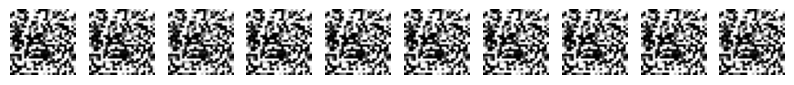

In [3]:
# Функция для генерации противоречивых примеров
def create_adversarial_examples(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    generated_images = generator.predict(noise)
    return generated_images

# Генерация 100 противоречивых примеров
adversarial_images = create_adversarial_examples(generator, 100)

# Визуализация сгенерированных противоречивых примеров
plt.figure(figsize=(10, 10))
for index in range(10):
    plt.subplot(1, 10, index + 1)
    plt.imshow(adversarial_images[index].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Шаг 4: Оценка моделей на противоречивых примерах

In [5]:
# Загрузка заранее обученных моделей
model1 = tf.keras.models.load_model('/content/mnist_model.h5')
model2 = tf.keras.models.load_model('/content/mnist_model.h5')

# Оценка первой модели на сгенерированных противоречивых примерах
adv_images_reshaped = adversarial_images.reshape(-1, 28, 28, 1)
loss1, acc1 = model1.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Точность первой модели на противоречивых примерах GAN: {acc1:.4f}')

# Оценка второй модели на сгенерированных противоречивых примерах
loss2, acc2 = model2.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Точность второй модели на противоречивых примерах GAN: {acc2:.4f}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 292.9376  
Точность первой модели на противоречивых примерах GAN: 0.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 292.9376  
Точность второй модели на противоречивых примерах GAN: 0.0000


### Вывод:

Обе модели продемонстрировали нулевую точность и значительные потери на противоречивых примерах. Первая модель показала точность **0.0** и потери **292.9376**, в то время как вторая модель имеет такие же потери **292.9376**. Эти результаты указывают на крайнюю уязвимость моделей к противоречивым примерам, созданным с использованием генеративных моделей GAN.